In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/StudyHoursMachineLeraning/Data_Set/1-studyhours.csv')
df

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7
5,18.0,78.8
6,19.2,77.1
7,22.2,90.8
8,25.2,99.0
9,17.4,84.6


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Study Hours,33.0,15.772727,7.608723,3.0,9.6,17.4,21.3,30.0
Exam Score,33.0,74.612121,18.711206,40.0,58.5,78.8,90.8,100.0


In [5]:
df.corr(numeric_only=True)

,Study Hours,Exam Score
Study Hours,1.000000,0.936376
Exam Score,0.936376,1.000000


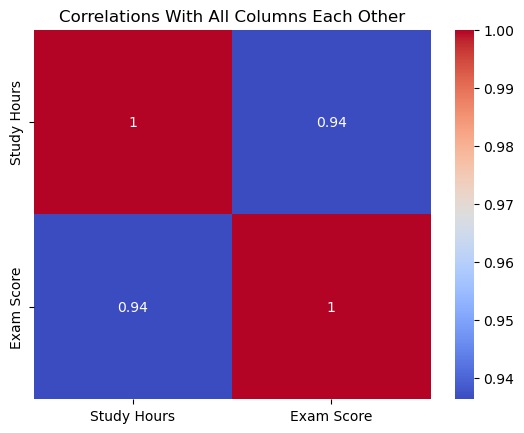

In [30]:
sns.heatmap(df.corr(numeric_only=True), cmap= 'coolwarm', annot=True)
plt.title('Correlations With All Columns Each Other')
plt.show()

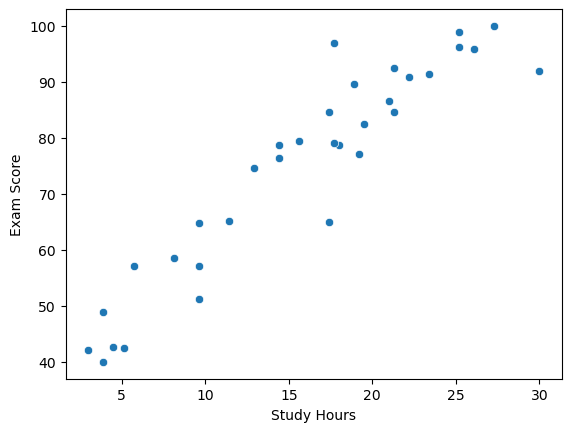

In [7]:
sns.scatterplot(data = df, x = 'Study Hours', y = 'Exam Score')
plt.show()

In [8]:
# indepented and depented feature
X = df[['Study Hours']]
y = df[['Exam Score']]
## Train - Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
print(f'Indepented Train Valudation ---> {X_train}')
print(f'Indepented Test Valudation ---> {X_test}')
print(f'Depented Train Valudation ---> {y_train}')
print(f'Depented Test Valudation ---> {y_test}')

Indepented Train Valudation --->     Study Hours
18         17.4
1           9.6
2           4.5
32         18.9
6          19.2
3          11.4
29         19.5
26          9.6
9          17.4
4          14.4
28         17.7
10         21.3
27         15.6
13         27.3
17         12.9
15         17.7
22         14.4
31         25.2
11         26.1
7          22.2
0           3.9
23          3.0
5          18.0
12         30.0
21          8.1
8          25.2
Indepented Test Valudation --->     Study Hours
25          5.1
14         21.0
30         23.4
16          5.7
24          9.6
20          3.9
19         21.3
Depented Train Valudation --->     Exam Score
18        64.9
1         57.1
2         42.7
32        89.6
6         77.1
3         65.1
29        82.4
26        64.8
9         84.6
4         78.7
28        79.1
10        92.4
27        79.5
13       100.0
17        74.7
15        97.0
22        76.5
31        96.2
11        95.9
7         90.8
0         40.0
23        42.2

In [9]:
# Standardize the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # fit --> Data leakage

In [10]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
print('Coefficient ', regression.coef_)
print('Intercept ', regression.intercept_)
print(f'Linear Regression Equation----->  y = {regression.intercept_} + {regression.coef_} * X')

Coefficient  [[16.17860223]]
Intercept  [76.90769231]
Linear Regression Equation----->  y = [76.90769231] + [[16.17860223]] * X


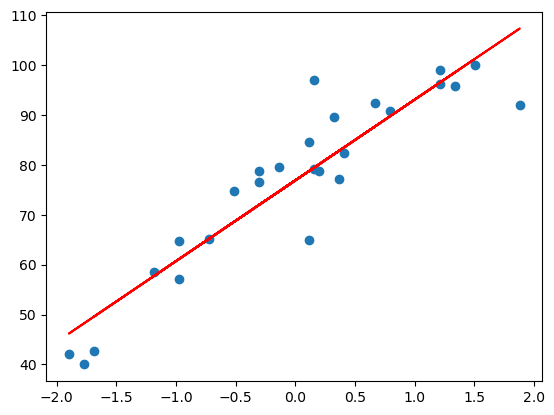

In [12]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), 'r')
plt.show()

In [13]:
# X = 20, y = ?

In [14]:
regression.predict([[20]])

array([[400.47973694]])

In [15]:
scaler.transform([[20]])

C:\Users\Mehmet Ersolak\.conda\envs\veriBilimi\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [16]:
regression.predict(scaler.transform([[20]]))

C:\Users\Mehmet Ersolak\.conda\envs\veriBilimi\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[84.70590731]])

In [17]:
regression.predict(scaler.transform([[10]]))

C:\Users\Mehmet Ersolak\.conda\envs\veriBilimi\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[62.05187491]])

In [18]:
regression.predict(scaler.transform([[5]]))

C:\Users\Mehmet Ersolak\.conda\envs\veriBilimi\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[50.72485871]])

In [19]:
regression.predict(scaler.transform([[25]]))

C:\Users\Mehmet Ersolak\.conda\envs\veriBilimi\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[96.0329235]])

In [21]:
# prediction with test data
y_pred_test = regression.predict(X_test)
y_pred_test

array([[50.95139904],
       [86.97131054],
       [92.40827832],
       [52.31064098],
       [61.14571361],
       [48.23291515],
       [87.65093152]])

In [22]:
y_test

,Exam Score
25,42.4
14,86.6
30,91.5
16,57.2
24,51.2
20,49.0
19,84.7


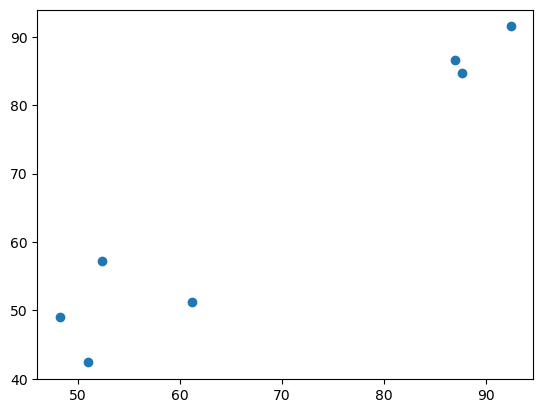

In [23]:
plt.scatter(y_pred_test, y_test)
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, adjusted_rand_score
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
print('mse', mse)
print('mae', mae)
print('rmse', rmse)

mse 29.45839048833392
mae 4.054868128856142
rmse 5.427558427906043


In [28]:
r2 = r2_score(y_test, y_pred_test)
print('r2 test: ', r2)

r2 test:  0.9196596206825491
